# 📰 Análise de Dados Meteorológicos do GHCN-Daily

## 👤 Informação Básica
- **Título do Projeto**: Análise de Dados Meteorológicos do GHCN-Daily
- **Alunos**:
  - João Carneiro, Nº 50938
  - Eduardo Abrantes, Nº 50391

## 💡 Contribuição

| Aluno        | Tarefa realizada                                                                 | Horas estimadas |
|--------------|----------------------------------------------------------------------------------|-----------------|
| João Carneiro   | Leitura e processamento dos dados em chunks, análise de valores nulos e cálculo das médias diárias  | 7h             |
| Eduardo Abrantes  | Agregação por estação e ano, substituição de IDs por nomes, visualização com Folium e documentação        | 7h             |

## 🎯 Background e Motivação

- Este projeto tem como objetivo a implementação de um pipeline de processamento de dados meteorológicos em larga escala, recorrendo a técnicas de chunking para análise eficiente de ficheiros massivos. Utilizando o dataset GHCN-Daily, que contém registos diários de temperatura e precipitação de milhares de estações meteorológicas ao longo de várias décadas, o sistema permite carregar, transformar e analisar os dados sem ultrapassar os limites de memória do sistema.
- A motivação principal passa pela necessidade de desenvolver competências práticas no manuseamento de grandes volumes de dados, com foco na sua limpeza, transformação e agregação eficiente. O projeto inclui também a visualização de estações meteorológicas portuguesas num mapa interativo, bem como a análise de tendências climáticas médias por local e ano. Ao aplicar técnicas escaláveis com Python e bibliotecas como pandas e NumPy, o projeto reforça a importância da eficiência computacional na Ciência de Dados moderna.

# ⚙️ Pré-Requisitos

## Instalação dos Dados
Antes de iniciar o projeto, é necessário realizar o download e preparação dos Dados Meteorológicos do GHCN-Daily. Siga os passos abaixo:

### 1. Download do Dataset

Realiza o download dos dados meteorológicos a partir do link:

🔗 [Download do dataset (Dropbox)](https://www.dropbox.com/s/oq36w90hm9ltgvc/global_climate_data.zip?dl=0)

### 2. Descompactação dos Ficheiros

Depois do download do ficheiro `global_climate_data.zip`, segue estes passos:

1. **Descompactar o `.zip`**:
   - Ao extrair vai obter o ficheiro `ghcnd_daily.tar.gz`.
   - E também vai obter 5 ficheiros `.txt` com dados auxiliares

2. **Descompactar o `ghcnd_daily.tar.gz`**:
   - Ao extrair irá criar uma pasta `ghcnd_daily` que vai conter dentro ela os dados meteorológicos em um ficheiro `ghcnd_daily.csv`.

### 3. Organização do Projeto

Crie uma pasta chamada `data` no mesmo diretório onde está o seu Jupyter Notebook. Esta pasta vai ser usada para armazenar todos os ficheiros extraídos, incluindo:

- O ficheiro `ghcnd_daily.csv` (extraído de `ghcnd_daily.tar.gz`)
- Os 5 ficheiros auxiliares `.txt`

A estrutura do projeto deverá ficar semelhante a:

## 📦 Setup de Dependências
Para a realização deste projeto, foram utilizadas bibliotecas fundamentais do Python para Ciência de Dados. A instalação das dependências foi realizada através do comando:

In [ ]:
!pip install pandas numpy matplotlib folium

#### Descrição das Bibliotecas

- pandas: biblioteca essencial para manipulação e análise de dados estruturados. Foi usada para ler e transformar os dados do ficheiro GHCN-Daily em formato tabular, aplicar filtros, calcular estatísticas e agregar os dados por estação e ano.

- numpy: utilizada para operações numéricas de baixo nível, nomeadamente no tratamento de valores ausentes e no cálculo de médias diárias, aproveitando a sua performance otimizada para arrays.

- matplotlib: biblioteca de visualização utilizada para gerar gráficos estáticos que ilustram padrões e tendências nos dados climáticos analisados.

- folium: biblioteca de visualização geográfica baseada em Leaflet.js. Foi utilizada para criar mapas interativos que mostram a localização das estações meteorológicas portuguesas selecionadas, permitindo uma representação espacial clara dos dados analisados.

## 📄 Configuração do Caminho dos Ficheiros de Dados

Após o setup das dependências, procedeu-se à leitura dos ficheiros disponibilizados no dataset GHCN-Daily. Foram carregados tanto os dados principais (`ghcnd_daily.csv`) como os ficheiros auxiliares de metadados (países, estações, versões e estados), que permitem contextualizar e enriquecer a análise.

O seguinte código foi utilizado para esta operação inicial:

In [1]:
import pandas as pd

# Caminhos dos ficheiros
ficheiro_csv = 'data/ghcnd_daily/ghcnd_daily.csv'
ficheiro_csv_processado = "data/dados_processados.csv"

ficheiro_countries ='data/ghcnd-countries.txt'
ficheiro_version = 'data/ghcnd-version.txt'
ficheiro_stations = 'data/ghcnd-stations.txt'
ficheiro_states = 'data/ghcnd-states.txt'


# 📊 Leitura de Dados e Alteração de Tipos de Dados para Melhoria de Desempenho (Exercício 1)

Este exercício tem como objetivo a leitura e transformação de dados meteorológicos diários, com foco na melhoria do desempenho através da alteração dos tipos de dados.

### Etapas Realizadas

- **Estrutura do arquivo**: O arquivo contém informações diárias de temperatura, com as seguintes colunas:
  - `id`
  - `year`
  - `month`
  - `element`
  - Valores de temperatura em `value1` a `value31`.

- **Leitura em chunks**:
  - A leitura foi realizada em chunks de 100.000 linhas utilizando a função `pd.read_csv()` do pandas.
  - Durante a leitura, os valores `-9999` foram substituídos por `NaN`, representando dados nulos e facilitando o tratamento posterior.

- **Conversão de tipos de dados**:
  - As colunas `id` e `element` foram convertidas para o tipo `category`, reduzindo o uso de memória.
  - A coluna `year` foi convertida para `int16` e `month` para `int8`, otimizando o armazenamento.
  - As colunas de `value1` a `value31` foram convertidas para `float32`, mais eficientes em termos de espaço do que o padrão `float64`.

- **Ajuste dos valores de temperatura**:
  - Os valores foram divididos por 10, uma vez que os dados originais estavam em décimos de graus Celsius (ex: 215 representa 21.5°C).

- **Criação de ficheiro processado**:
  - Após as transformações, os dados foram guardados num novo ficheiro CSV denominado `dados_processados.csv`, pronto para ser utilizado em análises subsequentes.

### Resultados

- **Ficheiro otimizado**: Foi criado o ficheiro `dados_processados.csv` com dados transformados, de menor dimensão e prontos para análise.

- **Eficiência melhorada**: A utilização de tipos de dados mais leves e a remoção de valores nulos tornaram o conjunto de dados mais eficiente em termos de tempo de carregamento e uso de memória.

- **Reutilização futura**: A nova versão do ficheiro será utilizada nos exercícios seguintes, evitando a repetição dos passos de pré-processamento.

---

O seguinte código foi utilizado para este exercício:

In [2]:
import pandas as pd
import numpy as np

# Colunas a utilizar
colunas_utilizadas = ['id', 'year', 'month', 'element'] + [f'value{i}' for i in range(1, 32)]

# Conversões de tipo de dados
conversoes_tipos = {
    'id': 'category',
    'year': 'int16',
    'month': 'int8',
    'element': 'category',
}
for i in range(1, 32):
    conversoes_tipos[f'value{i}'] = 'float32'

# Elementos de temperatura a converter
elementos_temp = ['TMAX', 'TMIN', 'TAVG', 'MDTX', 'MDTN']

# DataFrame para acumular tudo
df_resultado = pd.DataFrame()

# Iterar sobre os chunks
chunksize = 100_000
for chunk in pd.read_csv(
    ficheiro_csv,
    usecols=colunas_utilizadas,
    na_values=-9999,
    chunksize=chunksize
):
    # Conversão de tipos
    chunk = chunk.astype(conversoes_tipos)

    # Correção dos valores de temperatura e arredondamento
    mask_temp = chunk['element'].isin(elementos_temp)
    for i in range(1, 32):
        col = f'value{i}'
        chunk.loc[mask_temp, col] = (chunk.loc[mask_temp, col] / 10)

    # Acumular o chunk transformado
    df_resultado = pd.concat([df_resultado, chunk], ignore_index=True)
    
# Mostrar tipos de dados finais
print("\nTipos de dados após processamento:")
print(df_resultado.dtypes)

# Mostrar uma única vez o resultado final
print("\nDados processados (primeiras linhas):")
display(df_resultado.head())

df_resultado.to_csv(ficheiro_csv_processado, index=False)

print("\nNovo ficheiro lido com sucesso!")


Tipos de dados após processamento:
id           object
year          int16
month          int8
element    category
value1      float32
value2      float32
value3      float32
value4      float32
value5      float32
value6      float32
value7      float32
value8      float32
value9      float32
value10     float32
value11     float32
value12     float32
value13     float32
value14     float32
value15     float32
value16     float32
value17     float32
value18     float32
value19     float32
value20     float32
value21     float32
value22     float32
value23     float32
value24     float32
value25     float32
value26     float32
value27     float32
value28     float32
value29     float32
value30     float32
value31     float32
dtype: object

Dados processados (primeiras linhas):


,id,year,month,element,value1,value2,value3,value4,value5,value6,...,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31
0,ACW00011604,1949,1,TMAX,28.900000,28.900000,28.299999,28.299999,28.900000,28.900000,...,27.200001,26.700001,26.700001,26.700001,27.799999,27.200001,27.200001,27.200001,27.200001,27.200001
1,ACW00011604,1949,2,TMAX,26.700001,27.799999,27.200001,26.700001,27.799999,27.799999,...,27.200001,27.200001,26.700001,26.700001,26.700001,26.700001,27.200001,NaN,NaN,NaN
2,ACW00011604,1949,3,TMAX,27.200001,28.900000,27.799999,27.799999,27.799999,27.799999,...,27.200001,27.799999,27.799999,26.100000,26.100000,26.700001,26.700001,28.299999,27.799999,26.700001
3,ACW00011604,1949,4,TMAX,27.799999,28.299999,28.299999,29.400000,28.299999,28.299999,...,28.900000,28.900000,28.900000,30.600000,29.400000,27.200001,27.799999,28.900000,28.900000,NaN
4,ACW00011604,1949,5,TMAX,28.299999,28.299999,27.799999,27.200001,27.799999,28.299999,...,29.400000,28.900000,29.400000,30.000000,30.000000,30.000000,30.000000,30.000000,29.400000,30.000000



Novo ficheiro lido com sucesso!


# 💾 Análise de valores nulos com gráfico de barras (Exercício 2)

Neste exercício, o objetivo foi identificar a percentagem de valores nulos em cada uma das variáveis do conjunto de dados meteorológicos.

### Etapas Realizadas

- **Leitura por chunks**: A leitura foi realizada em chunks de 100.000 linhas utilizando a função `pd.read_csv()` do pandas.
  
- **Tratamento de dados nulos**: Durante a leitura, os valores `-9999` são substituídos por `NaN`, que representa dados nulos.

- **Cálculo da percentagem de nulos**:
  - Para cada chunk, foi calculada a percentagem de valores nulos por coluna.
  - Os resultados de todos os chunks foram acumulados e, ao final, foi calculada a média das percentagens para obter um valor representativo da totalidade dos dados.

- **Filtragem e ordenação**:
  - Apenas colunas com percentagem de nulos superior a 0% foram consideradas na análise final.
  - A variável com a maior percentagem de dados ausentes foi identificada e destacada.

- **Visualização**:
  - Um gráfico de barras horizontais foi gerado com `matplotlib` para visualizar de forma clara a distribuição dos valores nulos por variável. A biblioteca `matplotlib` foi ensinada na cadeira de Prospeção de Redes Sociais e na Web e aplicada neste exercício.

### Resultados

- **Variável com mais dados em falta**: A variável com a maior percentagem de valores nulos foi destacada no output.
- **Gráfico**: A visualização fornece uma análise clara das colunas com maior proporção de dados ausentes.

---

O seguinte código foi utilizado para este exercício:


Variável com mais dados em falta: 'value31' (45.09%)


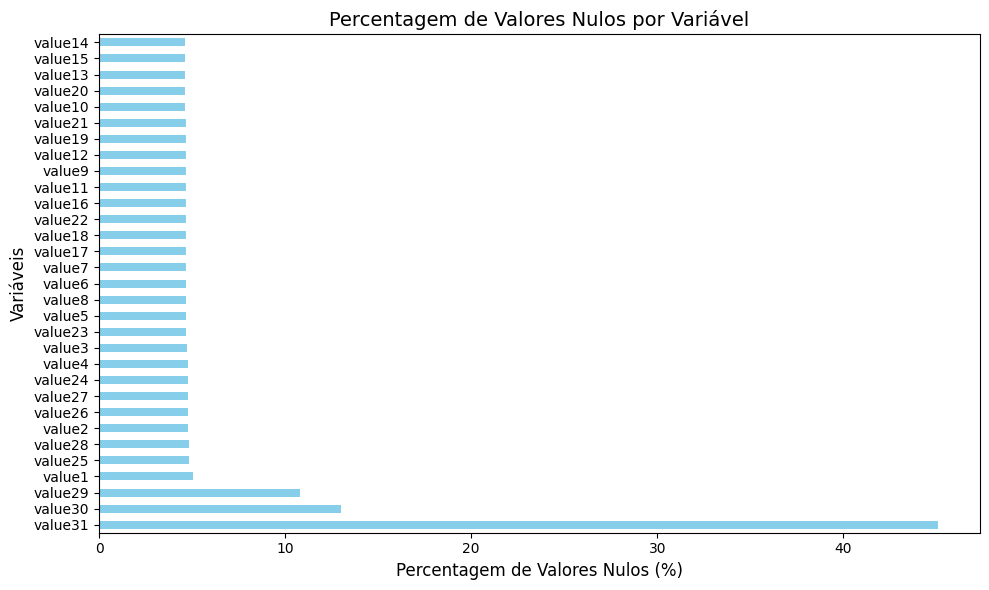


Percentagem de valores nulos por variável (sem 0%):
value31      45.0864
value30    13.012513
value29    10.812951
value1      5.023369
value25     4.844987
value28     4.827474
value2      4.799036
value26     4.795718
value27     4.788404
value24     4.763204
value4      4.762455
value3      4.741743
value23     4.694211
value5      4.687825
value8      4.675007
value6      4.674822
value7      4.672812
value17     4.670327
value18     4.666452
value22     4.666113
value16     4.662249
value11     4.660029
value9      4.656847
value12     4.648633
value19     4.647712
value21     4.646939
value10     4.646515
value20     4.644676
value13     4.634871
value15     4.631487
value14     4.625498
dtype: object


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Colunas que queremos utilizar
colunas_utilizadas = ['id', 'year', 'month', 'element'] + [f'value{i}' for i in range(1, 32)]

# DataFrame para acumular as percentagens de nulos
percentagem_nulos_total = pd.Series()

# Iterar sobre os chunks (100.000 linhas de cada vez)
chunksize = 100_000
for chunk in pd.read_csv(
    ficheiro_csv_processado,
    usecols=colunas_utilizadas,
    na_values=-9999,
    chunksize=chunksize
):
    # Calcular a percentagem de valores nulos em cada coluna do chunk
    percentagem_nulos = chunk.isnull().mean() * 100
    
    # Acumular os resultados de percentagem de nulos
    percentagem_nulos_total = percentagem_nulos_total.add(percentagem_nulos, fill_value=0)

# Calcular a média das percentagens de valores nulos
percentagem_nulos_media = percentagem_nulos_total / (len(pd.read_csv(ficheiro_csv, usecols=colunas_utilizadas, na_values=-9999).index) / chunksize)

percentagem_nulos_media = percentagem_nulos_media[percentagem_nulos_media > 0]

# Determinar a variável com mais dados em falta
variavel_mais_em_falta = percentagem_nulos_media.idxmax()
percentagem_max = percentagem_nulos_media.max()

print(f"\nVariável com mais dados em falta: '{variavel_mais_em_falta}' ({percentagem_max:.2f}%)")

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
percentagem_nulos_media.sort_values(ascending=False).plot(kind='barh', color='skyblue')

# Adicionar título e labels
plt.title('Percentagem de Valores Nulos por Variável', fontsize=14)
plt.xlabel('Percentagem de Valores Nulos (%)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Mostrar a percentagem de valores nulos (por variável)
print("\nPercentagem de valores nulos por variável (sem 0%):")
print(percentagem_nulos_media.sort_values(ascending=False))

# 📚 Determinação do Ano Mais Antigo e Mais Recente de Registo por Estação Meteorológica (Exercício 3)

O objetivo deste exercício foi identificar, para cada estação meteorológica, o ano mais antigo e o mais recente de registo disponível no conjunto de dados.

### Etapas Realizadas

- **Seleção de colunas relevantes**: Foram utilizadas apenas as colunas `id` (identificador da estação) e `year` (ano do registo).

- **Leitura por chunks**: A leitura foi realizada em chunks de 100.000 linhas utilizando a função `pd.read_csv()` do pandas.

- **Conversão de tipos**: A coluna `id` foi convertida para `string`, garantindo a consistência na manipulação dos identificadores das estações.

- **Cálculo dos anos mínimo e máximo**:
  - Utilizando `groupby('id')`, foi calculado o ano mais antigo (`min`) e o mais recente (`max`) de registo para cada estação dentro de cada chunk.
  - Os resultados de cada chunk foram acumulados num dicionário, atualizando os valores globais de `min` e `max` por estação à medida que novos dados eram processados.

- **Conversão para DataFrame**:
  - Após o processamento de todos os chunks, o dicionário com os anos foi convertido num `DataFrame` com as colunas: `id`, `min` (ano mais antigo) e `max` (ano mais recente).

- **Leitura do ficheiro de metadados das estações**:
  - Um ficheiro separado contendo os dados das estações (como localização, nome, etc.) foi lido com `pd.read_fwf()` e os respetivos IDs foram convertidos para string.

- **Junção dos dados**:
  - Os anos mínimos e máximos por estação foram combinados com os metadados das estações através de um `merge` com base na coluna `id`.

### Resultado

- O resultado final é um `DataFrame` que apresenta, para cada estação meteorológica:
  - O seu identificador (`id`)
  - O ano do primeiro registo (`min`)
  - O ano do último registo (`max`)
  - Informações adicionais como localização, nome da estação e códigos específicos

---

O seguinte código foi utilizado para este exercício:

In [10]:
import pandas as pd

# Colunas relevantes para os registos
colunas_utilizadas = ['id', 'year']

# Inicializar um DataFrame para acumular os anos por estação
anos_por_estacao_total = {}

# Processar os dados dos registos meteorológicos em chunks
chunksize = 100_000
for chunk in pd.read_csv(
    ficheiro_csv_processado,
    usecols=colunas_utilizadas,
    na_values=-9999,
    chunksize=chunksize
):
    # Garantir que o ID é string
    chunk['id'] = chunk['id'].astype(str)
    
    # Agrupar por estação e calcular o ano mínimo e máximo
    anos_chunk = chunk.groupby('id')['year'].agg(['min', 'max'])

    # Atualizar o acumulador global
    for station_id, row in anos_chunk.iterrows():
        if station_id in anos_por_estacao_total:
            anos_por_estacao_total[station_id]['min'] = min(anos_por_estacao_total[station_id]['min'], row['min'])
            anos_por_estacao_total[station_id]['max'] = max(anos_por_estacao_total[station_id]['max'], row['max'])
        else:
            anos_por_estacao_total[station_id] = {'min': row['min'], 'max': row['max']}

# Converter o dicionário para DataFrame
df_anos = pd.DataFrame.from_dict(anos_por_estacao_total, orient='index').reset_index()
df_anos.columns = ['id', 'min', 'max']

# Leitura dos dados das estações meteorológicas
colunas_estacoes = ['id', 'latitude', 'longitude', 'elevation', 'state', 'station_name', 'gsn_flag', 'hcn_crn_flag', 'wmo_id']
df_estacoes = pd.read_fwf(
    ficheiro_stations,
    widths=[11, 9, 10, 7, 2, 30, 3, 3, 5],
    header=None,
    names=colunas_estacoes,
    skiprows=1,
    encoding='latin1'
)

# Garantir que os IDs são strings
df_estacoes['id'] = df_estacoes['id'].astype(str)

# Juntar os dados dos anos com os das estações
df_estacoes_completos = df_anos.merge(df_estacoes, on='id', how='left')

# Exibir as primeiras linhas do resultado
print("\nAno mais antigo e mais recente por estação:")
display(df_estacoes_completos.head())


Ano mais antigo e mais recente por estação:


,id,min,max,latitude,longitude,elevation,state,station_name,gsn_flag,hcn_crn_flag,wmo_id
0,ACW00011604,1949,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACW00011647,1961,1961,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,1944,2019,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,NaN,GSN,NaN
3,AEM00041194,1983,2019,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,NaN
4,AEM00041217,1983,2019,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,NaN


# 🔍 Cálculo da Temperatura Média Diária por Estação, Ano e Mês (Exercício 4)

Neste exercício, o objetivo foi calcular a temperatura média diária para cada observação de estação, ano e mês, com base nos valores de temperatura das colunas `value1` até `value31`.

### Etapas Realizadas

- **Seleção das colunas relevantes**:
  - Foram selecionadas as colunas `id` (identificador da estação), `year` (ano), `month` (mês) e as colunas de valores de temperatura, que começam com `value` (como `value1`, `value2`, ..., `value31`).

- **Leitura em chunks**:
  - Os dados foram lidos em blocos de 100.000 linhas utilizando `pd.read_csv()`. Essa técnica de leitura em chunks permite processar grandes volumes de dados sem sobrecarregar a memória.

- **Cálculo da temperatura média diária**:
  - Para cada chunk de dados lido, foi calculada a média dos valores de temperatura (das colunas `value1` até `value31`) para cada observação. O cálculo da média foi feito com o método `chunk.filter(regex='^value').mean(axis=1)`.
  - A média foi arredondada para 2 casas decimais usando `round(2)` para garantir a precisão dos valores.

- **Agrupamento por estação, ano e mês**:
  - Após o cálculo da temperatura média diária para cada observação, os dados foram agrupados por `id` (estação), `year` (ano) e `month` (mês). Para cada grupo, a média da temperatura diária foi calculada novamente com o `groupby()`.

- **Acumulação de resultados**:
  - O resultado de cada chunk foi acumulado em um DataFrame final, `df_avg_temp_total`, utilizando a função `pd.concat()`.

### Resultado

- O DataFrame final contém as colunas:
  - `id`: Identificador da estação meteorológica
  - `year`: Ano do registo
  - `month`: Mês do registo
  - `daily_avg_temp`: Temperatura média diária para cada grupo de estação, ano e mês

- O resultado final mostra as primeiras linhas do DataFrame com as temperaturas médias calculadas.

---

O seguinte código foi utilizado para este exercício:

In [11]:
import pandas as pd

# Colunas relevantes para os registos
colunas_utilizadas = ['id', 'year', 'month'] + [col for col in pd.read_csv(ficheiro_csv_processado, nrows=1).columns if col.startswith('value')]

# DataFrame para acumular os resultados finais
df_avg_temp_total = pd.DataFrame()

# Tamanho do chunk
chunksize = 100_000

# Processar os dados dos registos meteorológicos em chunks
for chunk in pd.read_csv(
    ficheiro_csv_processado,
    usecols=colunas_utilizadas,
    na_values=-9999,
    chunksize=chunksize
):
    # Calcular a temperatura média diária
    chunk['daily_avg_temp'] = chunk.filter(regex='^value').mean(axis=1)
    
    # Limitar a temperatura a 2 casas decimais
    chunk['daily_avg_temp'] = chunk['daily_avg_temp'].round(2)

    # Agrupar por estação, ano e mês e calcular a temperatura média para este chunk
    df_avg_temp_chunk = chunk.groupby(['id', 'year', 'month'])['daily_avg_temp'].mean().reset_index()

    # Acumular o resultado do chunk
    df_avg_temp_total = pd.concat([df_avg_temp_total, df_avg_temp_chunk], ignore_index=True)

# Exibir o resultado final
print("\nTemperatura média diária por estação, ano e mês:")
display(df_avg_temp_total.head())


Temperatura média diária por estação, ano e mês:


,id,year,month,daily_avg_temp
0,ACW00011604,1949,1,27.46
1,ACW00011604,1949,2,27.11
2,ACW00011604,1949,3,27.79
3,ACW00011604,1949,4,28.72
4,ACW00011604,1949,5,29.14


# 🔍 Cálculo da Temperatura Média Anual por Estação (Exercício 5)

Neste exercício, o objetivo foi calcular a temperatura média anual para cada estação meteorológica com base nas médias diárias de temperatura registradas. Para isso, foram seguidas as seguintes etapas:

### Etapas Realizadas

- **Leitura dos Dados em Chunks**:
  - Os dados foram lidos em blocos de 100.000 linhas utilizando a função `pd.read_csv()`. A leitura em chunks foi utilizada para otimizar o uso de memória ao processar grandes volumes de dados.

- **Filtragem das Colunas de Temperatura**:
  - Para calcular a média das temperaturas diárias, foram selecionadas as colunas que começam com `value`, que contêm os valores de temperatura para cada observação. As colunas de temperatura variam de `value1` a `value31`, dependendo do número de dias no mês.

- **Cálculo da Temperatura Média Diária**:
  - Para cada chunk de dados, foi calculada a média dos valores das colunas de temperatura, utilizando o método `chunk.filter(regex='^value').mean(axis=1)`. Esse cálculo forneceu a temperatura média diária para cada observação de estação, ano e mês.

- **Agrupamento por Estação e Ano**:
  - Após o cálculo da temperatura média diária, os dados foram agrupados por `station_name` (nome da estação) e `year` (ano). A média das temperaturas diárias foi calculada para cada grupo, fornecendo a temperatura média anual para cada estação.

- **Acumulação dos Resultados**:
  - O resultado de cada chunk foi acumulado em um DataFrame final, `df_resultado_total`, utilizando a função `pd.concat()`. Isso permitiu juntar todos os resultados intermediários e gerar o DataFrame final com as médias anuais.

- **Arredondamento**:
  - Para garantir a precisão e facilitar a leitura dos resultados, as temperaturas médias anuais foram arredondadas para 2 casas decimais utilizando o método `round(2)`.

### Resultado

- O DataFrame final contém as colunas:
  - `station_name`: Nome da estação meteorológica
  - `year`: Ano do registo
  - `daily_avg_temp`: Temperatura média anual calculada para cada estação e ano

- O resultado final mostra as primeiras linhas do DataFrame com as temperaturas médias anuais calculadas.

---

O seguinte código foi utilizado para este exercício:

In [12]:
import pandas as pd

# DataFrame para acumular os resultados finais
df_resultado_total = pd.DataFrame()

# Tamanho do chunk
chunksize = 100000

# Processar os dados dos registos meteorológicos em chunks
for chunk in pd.read_csv(
    ficheiro_csv_processado,
    na_values=-9999,
    chunksize=chunksize
):
    # Filtrar colunas que começam com "value"
    colunas_valores = [col for col in chunk.columns if col.startswith('value')]

    # Calcular a temperatura média diária por estação/ano/mês para o chunk
    chunk['daily_avg_temp'] = chunk[colunas_valores].mean(axis=1)

    # Manter apenas colunas relevantes
    df_avg_temp_chunk = chunk[['id', 'year', 'month', 'daily_avg_temp']].copy()

    # Garantir que os IDs são strings
    df_avg_temp_chunk['id'] = df_avg_temp_chunk['id'].astype(str)

    # Juntar nome da estação
    df_temp_com_nome_chunk = df_avg_temp_chunk.merge(
        df_estacoes[['id', 'station_name']],
        on='id',
        how='left'
    )

    # Agrupar por nome da estação e ano e calcular a média das temperaturas diárias para o chunk
    df_resultado_chunk = df_temp_com_nome_chunk.groupby(['station_name', 'year'])['daily_avg_temp'].mean().reset_index()

    # Acumular o resultado do chunk
    df_resultado_total = pd.concat([df_resultado_total, df_resultado_chunk], ignore_index=True)

# Arredondar o resultado a 2 casas decimais
df_resultado_total['daily_avg_temp'] = df_resultado_total['daily_avg_temp'].round(2)

# Mostrar resultados
print("\nTemperatura média anual por estação (com base nas médias diárias):")
display(df_resultado_total.head())


Temperatura média anual por estação (com base nas médias diárias):


,station_name,year,daily_avg_temp
0,ABU DHABI INTL,1983,32.86
1,ABU DHABI INTL,1984,33.78
2,ABU DHABI INTL,1985,34.02
3,ABU DHABI INTL,1986,34.18
4,ABU DHABI INTL,1987,34.39


# 🌦️ Seleção dos Dados Meteorológicos das 5 Estações Portuguesas (Exercício 6)

Neste exercício, o objetivo foi filtrar os dados meteorológicos de todas as estações situadas em Portugal. Para isso, foram seguidas as seguintes etapas:

### Etapas Realizadas

- **Leitura dos Dados das Estações**:
  - Utilizou-se o método `pd.read_fwf()` para ler as informações das estações meteorológicas, com base em um formato fixo. As colunas relevantes, como o `id` (identificador da estação) e `station_name` (nome da estação), foram extraídas para identificação das estações.

- **Filtragem das Estações Portuguesas**:
  - Para identificar as estações meteorológicas localizadas em Portugal, foi feito um filtro no campo `id`, considerando apenas as estações cujo `id` começa com "PO", que é o indicativo para as estações em Portugal.

- **Leitura dos Registos Meteorológicos em Chunks**:
  - Os dados meteorológicos foram lidos em blocos de 100.000 linhas utilizando `pd.read_csv()`. A leitura em chunks foi aplicada para otimizar o uso de memória ao processar grandes volumes de dados.

- **Seleção das Colunas Relevantes**:
  - Para cada chunk de dados lido, foram selecionadas as colunas relevantes, incluindo o `id` (estação), `year` (ano), `month` (mês), `element` (tipo de dado) e as colunas de valores de temperatura (de `value1` a `value31`).

- **Filtragem dos Registos para Estações Portuguesas**:
  - Após a leitura de cada chunk, os registos foram filtrados para incluir apenas aqueles cujos `id` correspondem às estações localizadas em Portugal, que foram previamente identificadas.

- **Acumulação dos Resultados**:
  - O resultado de cada chunk foi acumulado em diversos DataFrames, um para cada Estação `df_filtrado_cidade`, e um DataFrame final, `df_filtrado_todos`, utilizando a função `pd.concat()`.

### Resultado

- O DataFrame final contém as colunas:
  - `id`: Identificador da estação meteorológica
  - `year`: Ano do registo
  - `month`: Mês do registo
  - `element`: Tipo de dado meteorológico (por exemplo, temperatura)
  - `value1`, `value2`, ..., `value31`: Valores diários de temperatura para cada estação, ano e mês

- O resultado final mostra as primeiras linhas do DataFrame filtrado, que contém apenas os dados das estações meteorológicas portuguesas.

---

O seguinte código foi utilizado para este exercício:

In [14]:
import pandas as pd
import warnings

# Desativar os warnings de Dtype
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# Leitura das estações
colspecs = [
    (0, 11), (12, 20), (21, 30), (31, 37), (38, 40),
    (41, 71), (72, 75), (76, 79), (80, 85)
]
colunas_estacoes = [
    'id', 'latitude', 'longitude', 'elevation', 'state',
    'station_name', 'gsn_flag', 'hcn_crn_flag', 'wmo_id'
]
df_estacoes = pd.read_fwf(
    ficheiro_stations,
    colspecs=colspecs,
    names=colunas_estacoes,
    dtype={'id': str}
)

estacoes_pt = df_estacoes[df_estacoes['id'].str.startswith('PO')]


# Procurar nomes das 5 estações portuguesas (ignorar maiúsculas/minúsculas)
estacao_pt_horta = estacoes_pt[estacoes_pt['station_name'].str.contains('HORTA', case=False, na=False)]
estacao_pt_funchal = estacoes_pt[estacoes_pt['station_name'].str.contains('FUNCHAL', case=False, na=False)]
estacao_pt_lisboa = estacoes_pt[estacoes_pt['station_name'].str.contains('LISBOA', case=False, na=False)]
estacao_pt_cb = estacoes_pt[estacoes_pt['station_name'].str.contains('CASTELO BRANCO', case=False, na=False)]
estacao_pt_faro = estacoes_pt[estacoes_pt['station_name'].str.contains('FARO', case=False, na=False)]

estacoes_pt_filtradas = pd.concat([
    estacao_pt_horta['id'],
    estacao_pt_funchal['id'],
    estacao_pt_lisboa['id'],
    estacao_pt_cb['id'],
    estacao_pt_faro['id']
])

# Inicializar listas para acumular os chunks
lista_todos = []
lista_horta = []
lista_funchal = []
lista_lisboa = []
lista_cb = []
lista_faro = []

chunksize = 100_000
colunas_desejadas = ['id', 'year', 'month', 'element'] + [f'value{i}' for i in range(1, 32)]

for chunk in pd.read_csv(ficheiro_csv_processado, na_values=-9999, chunksize=chunksize):
    chunk_filtrado_todos = chunk[chunk['id'].isin(estacoes_pt_filtradas)][colunas_desejadas]
    chunk_filtrado_horta = chunk[chunk['id'].isin(estacao_pt_horta['id'])][colunas_desejadas]
    chunk_filtrado_funchal = chunk[chunk['id'].isin(estacao_pt_funchal['id'])][colunas_desejadas]
    chunk_filtrado_lisboa = chunk[chunk['id'].isin(estacao_pt_lisboa['id'])][colunas_desejadas]
    chunk_filtrado_cb = chunk[chunk['id'].isin(estacao_pt_cb['id'])][colunas_desejadas]
    chunk_filtrado_faro = chunk[chunk['id'].isin(estacao_pt_faro['id'])][colunas_desejadas]

    lista_todos.append(chunk_filtrado_todos)
    lista_horta.append(chunk_filtrado_horta)
    lista_funchal.append(chunk_filtrado_funchal)
    lista_lisboa.append(chunk_filtrado_lisboa)
    lista_cb.append(chunk_filtrado_cb)
    lista_faro.append(chunk_filtrado_faro)

# Concatenar tudo no final (por motivos de performance)
df_filtrado_todos = pd.concat(lista_todos, ignore_index=True)
df_filtrado_horta = pd.concat(lista_horta, ignore_index=True)
df_filtrado_funchal = pd.concat(lista_funchal, ignore_index=True)
df_filtrado_lisboa = pd.concat(lista_lisboa, ignore_index=True)
df_filtrado_cb = pd.concat(lista_cb, ignore_index=True)
df_filtrado_faro = pd.concat(lista_faro, ignore_index=True)


# Mostrar resultados

# Mostrar 15 linhas no máximo por display / print
pd.set_option('display.max_columns', 15)


print("\nRegistos 15 de estações portuguesas:")
display(df_filtrado_todos)

print("\nRegistos da estação Horta:")
display(df_filtrado_horta)

print("\nRegistos das estações Funchal | FUNCHAL/S.CATARINA:")
display(df_filtrado_funchal)

print("\nRegistos da estação Lisboa :")
display(df_filtrado_lisboa)

print("\nRegistos da estação Castelo Branco:")
display(df_filtrado_cb)

print("\nRegistos da estação Faro:")
display(df_filtrado_faro)


Registos 15 de estações portuguesas:


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,PO000008506,1973,1,TMAX,NaN,11.0,NaN,...,13.0,NaN,NaN,NaN,NaN,18.0,NaN
1,PO000008506,1973,2,TMAX,17.0,16.0,12.0,...,17.0,18.0,17.0,17.0,NaN,NaN,NaN
2,PO000008506,1973,3,TMAX,NaN,15.0,16.0,...,17.0,17.0,18.0,NaN,NaN,NaN,18.0
3,PO000008506,1973,4,TMAX,18.0,17.0,NaN,...,NaN,NaN,17.0,17.0,18.0,18.0,NaN
4,PO000008506,1973,5,TMAX,14.0,NaN,NaN,...,NaN,19.0,18.0,19.0,NaN,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,POM00008570,2018,8,TMAX,NaN,42.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3157,POM00008570,2018,9,TMAX,NaN,NaN,NaN,...,NaN,30.8,NaN,NaN,NaN,NaN,NaN
3158,POM00008570,2018,10,TMAX,29.7,28.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3159,POM00008570,2019,3,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registos da estação Horta:


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,PO000008506,1973,1,TMAX,NaN,11.0,NaN,...,13.0,NaN,NaN,NaN,NaN,18.0,NaN
1,PO000008506,1973,2,TMAX,17.0,16.0,12.0,...,17.0,18.0,17.0,17.0,NaN,NaN,NaN
2,PO000008506,1973,3,TMAX,NaN,15.0,16.0,...,17.0,17.0,18.0,NaN,NaN,NaN,18.0
3,PO000008506,1973,4,TMAX,18.0,17.0,NaN,...,NaN,NaN,17.0,17.0,18.0,18.0,NaN
4,PO000008506,1973,5,TMAX,14.0,NaN,NaN,...,NaN,19.0,18.0,19.0,NaN,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,PO000008506,2018,8,TMAX,NaN,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,PO000008506,2018,9,TMAX,NaN,NaN,NaN,...,NaN,25.4,26.6,NaN,24.7,NaN,NaN
255,PO000008506,2018,10,TMAX,25.0,25.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,PO000008506,2019,3,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registos das estações Funchal | FUNCHAL/S.CATARINA:


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,PO000008522,1997,1,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.1,20.8
1,PO000008522,1997,2,TMAX,21.5,21.3,24.6,...,20.3,21.3,20.0,21.2,NaN,NaN,NaN
2,PO000008522,1997,6,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PO000008522,1997,7,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,24.8,24.5,25.7,26.6
4,PO000008522,1997,8,TMAX,25.6,24.4,25.5,...,26.4,NaN,25.7,26.5,25.8,25.3,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,POM00008521,2018,7,TMAX,NaN,23.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,POM00008521,2018,8,TMAX,NaN,25.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,POM00008521,2018,9,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,POM00008521,2018,10,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registos da estação Lisboa :


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,PO000008535,1900,12,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.6
1,PO000008535,1901,1,TMAX,14.6,14.6,11.9,...,14.3,15.0,13.9,13.4,12.0,7.6,11.3
2,PO000008535,1901,2,TMAX,12.1,12.6,12.0,...,13.5,13.6,14.1,14.3,NaN,NaN,NaN
3,PO000008535,1901,3,TMAX,15.4,14.1,16.3,...,16.0,14.4,14.1,15.1,15.2,16.9,15.4
4,PO000008535,1901,4,TMAX,15.3,18.6,24.7,...,13.8,15.8,17.5,15.7,16.2,20.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,PO000008535,2018,7,TMAX,NaN,24.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,PO000008535,2018,8,TMAX,NaN,39.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,PO000008535,2018,9,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.6,NaN,NaN
1375,PO000008535,2018,10,TMAX,NaN,30.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registos da estação Castelo Branco:


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,POM00008570,1990,10,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POM00008570,1990,11,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POM00008570,1990,12,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.1
3,POM00008570,1996,9,TMAX,30.6,30.9,29.9,...,22.8,28.0,31.2,33.0,32.7,29.4,NaN
4,POM00008570,1996,10,TMAX,20.7,23.8,26.0,...,23.0,22.6,23.3,21.7,21.0,20.3,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,POM00008570,2018,8,TMAX,NaN,42.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,POM00008570,2018,9,TMAX,NaN,NaN,NaN,...,NaN,30.8,NaN,NaN,NaN,NaN,NaN
254,POM00008570,2018,10,TMAX,29.7,28.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,POM00008570,2019,3,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registos da estação Faro:


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,POM00008554,1973,1,TMAX,14.0,14.0,15.0,...,16.0,16.0,17.0,15.0,14.0,16.0,NaN
1,POM00008554,1973,2,TMAX,20.0,16.0,15.0,...,19.0,22.0,20.0,19.0,NaN,NaN,NaN
2,POM00008554,1973,3,TMAX,17.0,17.0,21.0,...,20.0,19.0,22.0,23.0,21.0,22.0,21.0
3,POM00008554,1973,4,TMAX,20.0,20.0,20.0,...,17.0,21.0,20.0,20.0,20.0,22.0,NaN
4,POM00008554,1973,5,TMAX,21.0,21.0,21.0,...,NaN,24.0,27.0,27.0,NaN,25.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,POM00008554,2019,5,TMAX,NaN,24.7,NaN,...,NaN,NaN,NaN,NaN,28.4,28.4,28.1
533,POM00008554,2019,6,TMAX,NaN,NaN,NaN,...,25.0,NaN,NaN,29.1,26.7,NaN,NaN
534,POM00008554,2019,7,TMAX,NaN,NaN,NaN,...,28.7,NaN,24.2,NaN,32.3,34.1,NaN
535,POM00008554,2019,8,TMAX,NaN,NaN,27.7,...,27.9,27.5,25.7,NaN,30.5,NaN,30.6


## 🌦️ Seleção dos Dados Meteorológicos de todas as Estações Portuguesas (Exercício 6.1 EXTRA)

Neste exercício, o objetivo foi filtrar os dados meteorológicos de todas as estações situadas em Portugal. Para isso, foram seguidas as seguintes etapas:

### Etapas Realizadas

- **Leitura dos Dados das Estações**:
  - Utilizou-se o método `pd.read_fwf()` para ler as informações das estações meteorológicas, com base em um formato fixo. As colunas relevantes, como o `id` (identificador da estação) e `station_name` (nome da estação), foram extraídas para identificação das estações.

- **Filtragem das Estações Portuguesas**:
  - Para identificar as estações meteorológicas localizadas em Portugal, foi feito um filtro no campo `id`, considerando apenas as estações cujo `id` começa com "PO", que é o indicativo para as estações em Portugal.

- **Leitura dos Registos Meteorológicos em Chunks**:
  - Os dados meteorológicos foram lidos em blocos de 100.000 linhas utilizando `pd.read_csv()`. A leitura em chunks foi aplicada para otimizar o uso de memória ao processar grandes volumes de dados.

- **Seleção das Colunas Relevantes**:
  - Para cada chunk de dados lido, foram selecionadas as colunas relevantes, incluindo o `id` (estação), `year` (ano), `month` (mês), `element` (tipo de dado) e as colunas de valores de temperatura (de `value1` a `value31`).

- **Filtragem dos Registos para Estações Portuguesas**:
  - Após a leitura de cada chunk, os registos foram filtrados para incluir apenas aqueles cujos `id` correspondem às estações localizadas em Portugal, que foram previamente identificadas.

- **Acumulação dos Resultados**:
  - O resultado de cada chunk foi acumulado em um DataFrame final, `df_filtrado`, utilizando a função `pd.concat()`.

### Resultado

- O DataFrame final contém as colunas:
  - `id`: Identificador da estação meteorológica
  - `year`: Ano do registo
  - `month`: Mês do registo
  - `element`: Tipo de dado meteorológico (por exemplo, temperatura)
  - `value1`, `value2`, ..., `value31`: Valores diários de temperatura para cada estação, ano e mês

- O resultado final mostra as primeiras linhas do DataFrame filtrado, que contém apenas os dados das estações meteorológicas portuguesas.

---

O seguinte código foi utilizado para este exercício:

In [15]:
import pandas as pd

colspecs = [
    (0, 11), (12, 20), (21, 30), (31, 37), (38, 40),
    (41, 71), (72, 75), (76, 79), (80, 85)
]

colunas_estacoes = [
    'id', 'latitude', 'longitude', 'elevation', 'state',
    'station_name', 'gsn_flag', 'hcn_crn_flag', 'wmo_id'
]

df_estacoes = pd.read_fwf(
    ficheiro_stations,
    colspecs=colspecs,
    names=colunas_estacoes,
    dtype={'id': str}
)

# Filtrar estações que começam com "PO" (indicativo de Portugal)
estacoes_pt = df_estacoes[df_estacoes['id'].str.startswith('PO')]

# Mostrar IDs encontrados
print("Estações portuguesas encontradas:")
print(estacoes_pt[['id', 'station_name']])

# Ler registos meteorológicos em chunking de 100.000
chunksize = 100000
df_filtrado = pd.DataFrame()

for chunk in pd.read_csv(ficheiro_csv_processado, na_values=-9999, chunksize=chunksize):
    colunas_desejadas = ['id', 'year', 'month', 'element'] + [f'value{i}' for i in range(1, 32)]
    chunk_filtrado = chunk[chunk['id'].isin(estacoes_pt['id'])][colunas_desejadas]
    df_filtrado = pd.concat([df_filtrado, chunk_filtrado], ignore_index=True)

# Mostrar resultados
display(df_filtrado.head())

Estações portuguesas encontradas:
                id        station_name
47043  PO000008282              TAVIRA
47044  PO000008506      HORTA (AZORES)
47045  PO000008522             FUNCHAL
47046  PO000008535    LISBOA GEOFISICA
47047  PO000008546               PORTO
47048  PO000008549             COIMBRA
47049  PO000008562                BEJA
47050  PO000008575            BRAGANCA
47051  POE00100957             EXTREMO
47052  POE00100958       PONTE DE LIMA
47053  POE00100959            BARCELOS
47054  POE00100960            AMARANTE
47055  POE00100961               CAMPI
47056  POE00100962     AGUIAR DA BEIRA
47057  POE00100963          ALMEIDINHA
47058  POE00100964    GAFANHA DA NAZAR
47059  POM00008501              FLORES
47060  POM00008512       PONTA DELGADA
47061  POM00008515         SANTA MARIA
47062  POM00008521  FUNCHAL/S.CATARINA
47063  POM00008524         PORTO SANTO
47064  POM00008548    COIMBRA/CERNACHE
47065  POM00008554                FARO
47066  POM00008558      EVORA/

,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,PO000008282,1940,12,TMAX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.7
1,PO000008282,1941,1,TMAX,13.7,10.5,9.6,...,17.5,14.7,17.0,18.9,18.9,15.5,15.5
2,PO000008282,1941,2,TMAX,15.6,16.4,11.6,...,17.3,17.1,16.5,20.5,NaN,NaN,NaN
3,PO000008282,1941,3,TMAX,18.3,17.3,17.4,...,18.6,18.7,18.5,16.9,17.3,16.5,17.1
4,PO000008282,1941,4,TMAX,19.5,15.6,17.3,...,17.4,18.1,18.8,18.1,18.3,20.2,NaN


# 🌍 Substituição de IDs por Nomes de Estações Meteorológicas no DataFrame (Exercício 7)

Neste exercício, o objetivo foi substituir os identificadores das estações meteorológicas pelos respetivos nomes completos, com o objetivo de melhorar a legibilidade e usabilidade dos dados. Para isso, foram seguidas as seguintes etapas:

### Etapas Realizadas

- **Leitura dos Dados das Estações**:
  - Utilizou-se o método `pd.read_fwf()` para ler as informações das estações meteorológicas a partir de um ficheiro em formato de largura fixa. Foram extraídas duas colunas principais: `id` (identificador da estação) e `station_name` (nome da estação).

- **Leitura dos Registos Meteorológicos em Chunks**:
  - Os dados meteorológicos foram lidos em blocos de 100.000 linhas usando `pd.read_csv()`. A leitura em chunks foi aplicada para otimizar a utilização de memória ao processar grandes volumes de dados.

- **Seleção das Colunas Relevantes**:
  - Em cada chunk de dados lido, foram selecionadas as colunas necessárias: `id`, `year`, `month`, `element`, e os valores diários de temperatura (`value1` a `value31`).

- **Substituição de IDs pelo Nome das Estações**:
  - Cada chunk foi cruzado (`merge`) com a tabela de estações para obter o nome da estação correspondente ao `id`.
  - Em seguida, o campo `id` foi substituído pelo nome da estação (`station_name`) e a coluna auxiliar `station_name` foi removida.

- **Acumulação dos Resultados**:
  - Os chunks transformados foram acumulados num único DataFrame final, `df_resultado`, utilizando a função `pd.concat()`.

- **Exportação dos Dados Processados**:
  - O DataFrame resultante foi exportado para um ficheiro CSV contendo os dados meteorológicos com os nomes completos das estações.

### Resultado

- O DataFrame final contém as colunas:
  - `id`: Nome da estação meteorológica (substituído a partir do identificador original)
  - `year`: Ano do registo
  - `month`: Mês do registo
  - `element`: Tipo de dado meteorológico
  - `value1`, `value2`, ..., `value31`: Valores diários para cada estação, ano e mês

- O resultado final mostra as primeiras linhas do DataFrame com os nomes das estações, facilitando a interpretação dos dados.

---

O seguinte código foi utilizado para este exercício:


In [ ]:
import pandas as pd

# Leitura das estações
colspecs = [
    (0, 11), (41, 71)
]

colunas_estacoes = [
    'id',
    'station_name',
]

# Ler os dados das estações
df_estacoes = pd.read_fwf(
    ficheiro_stations,
    colspecs=colspecs,
    names=colunas_estacoes,
    dtype={'id': str}
)

# Tamanho do chunk
chunksize = 100000

# DataFrame para acumular os resultados finais
df_resultado = pd.DataFrame()

# Iterar sobre os chunks
for chunk in pd.read_csv(
    ficheiro_csv_processado,
    usecols=['id', 'year', 'month', 'element'] + [f'value{i}' for i in range(1, 32)],
    na_values=-9999,
    chunksize=chunksize
):
    # Juntar com nomes das estações
    chunk = chunk.merge(df_estacoes, on='id', how='left')

    # Substituir 'id' pelo nome da estação
    chunk['id'] = chunk['station_name']

    # Remover a coluna 'station_name' após a substituição
    chunk = chunk.drop(columns=['station_name'])

    # Acumular o chunk transformado
    df_resultado = pd.concat([df_resultado, chunk], ignore_index=True)

# Mostrar o DataFrame final
print("\nDados finais (primeiras linhas):")
display(df_resultado.head())

# Salvar o DataFrame processado, se necessário
df_resultado.to_csv("data/dados_estacoes_com_nome.csv", index=False)



Dados finais (primeiras linhas):


,id,year,month,element,value1,value2,value3,...,value25,value26,value27,value28,value29,value30,value31
0,ST JOHNS COOLIDGE FLD,1949,1,TMAX,28.9,28.9,28.3,...,26.7,27.8,27.2,27.2,27.2,27.2,27.2
1,ST JOHNS COOLIDGE FLD,1949,2,TMAX,26.7,27.8,27.2,...,26.7,26.7,26.7,27.2,NaN,NaN,NaN
2,ST JOHNS COOLIDGE FLD,1949,3,TMAX,27.2,28.9,27.8,...,26.1,26.1,26.7,26.7,28.3,27.8,26.7
3,ST JOHNS COOLIDGE FLD,1949,4,TMAX,27.8,28.3,28.3,...,30.6,29.4,27.2,27.8,28.9,28.9,NaN
4,ST JOHNS COOLIDGE FLD,1949,5,TMAX,28.3,28.3,27.8,...,30.0,30.0,30.0,30.0,30.0,29.4,30.0


##### 📍 Visualização da Localização Atual num Mapa Interativo com Folium (Exercício 8)

Neste exercício, o objetivo foi mostrar a localização do utilizador em um mapa interativo. Para isso, foram seguidas as seguintes etapas:

### Etapas Realizadas

- **Obter a localização do utilizador**:
  - Recorreu-se a API `https://ipinfo.io/json`, e a biblioteca `requests` do python, para obter a latitude e longitude apróximada do utilizador, o utilizador depois pode optar por usar os valores obtidos pela API ou inserir manualmente a sua latitude e longitude.

- **Validação da localização do utilizador**:
  - Se o utilizador optar por inserir a localização manualmente, ela é validada, e se for incorreta, ele opta por usar a localização determinada automáticamente.

- **Visualização da localização do utilizador**:
  - Para visualizar a localização do utilizador, recorremos a biblioteca `Folium`, que permite criar um mapa interativo, e criar 📍 marcadores numa determinada latitude e longitude.
  
---

O seguinte código foi utilizado para este exercício:

In [19]:
import folium
import requests

def obter_localizacao_ip():
    try:
        resposta = requests.get('https://ipinfo.io/json')
        dados = resposta.json()
        lat, lon = dados['loc'].split(',')
        city = dados['city'] or 'Desconhecida'
        region = dados['region'] or 'Desconhecida'
        return float(lat), float(lon), city, region
    except:
        return None, None, None, None

def escolher_localizacao(lat, lon):
    print(f"Localização detectada: Latitude = {lat}, Longitude = {lon}, Região = {region}, Cidade = {city}")
    escolha = input("Usar essa localização ? (S/n): ").strip().lower()

    if escolha in ['', 's', 'sim']:
        return lat, lon
    else:
        try:
            lat_manual = float(input("Digite sua latitude: ").strip())
            lon_manual = float(input("Digite sua longitude: ").strip())
            return lat_manual, lon_manual
        except:
            print("Entrada inválida. Usando localização detectada.")
            return lat, lon

lat, lon, city, region = obter_localizacao_ip()
lat, lon = escolher_localizacao(lat, lon)

mapa = folium.Map(location=[lat, lon], zoom_start=13)
folium.Marker([lat, lon], popup="Você está aqui").add_to(mapa)
mapa

Localização detectada: Latitude = 38.7167, Longitude = -9.1333, Região = Lisbon, Cidade = Lisbon


Usar essa localização ? (S/n):  S


# 📍 Visualização da Localização de Estações Meteorológicas em Portugal com Folium (Exercício 8.1)

Neste exercício, o objetivo foi identificar e visualizar num mapa interativo apenas as estações meteorológicas situadas em Portugal, utilizando os dados disponíveis num ficheiro de estações e um ficheiro de registos meteorológicos processados.

### Etapas Realizadas

- **Leitura dos Dados das Estações**:
  - Utilizou-se `pd.read_fwf()` para ler o ficheiro fixo das estações meteorológicas, com colunas definidas para `id`, `latitude`, `longitude` e `station_name`.

- **Identificação das Estações Utilizadas**:
  - Com o `pd.read_csv()` em chunks de 100.000 linhas, foram recolhidos todos os identificadores (`id`) presentes nos dados meteorológicos. 
  - Criou-se um conjunto (`set`) com todos os IDs únicos encontrados, representando as estações realmente utilizadas nos dados.

- **Filtragem das Estações Válidas**:
  - Os IDs recolhidos foram cruzados com o DataFrame de estações para obter os dados geográficos correspondentes.
  - Em seguida, foi aplicado um filtro para selecionar apenas as estações portuguesas, isto é, aquelas cujo `id` começa por "PO".

- **Cálculo do Centro do Mapa**:
  - Para que o mapa se centrasse adequadamente sobre Portugal, foi calculada a média das latitudes e longitudes das estações portuguesas, utilizando `mean()`.

- **Criação do Mapa com Folium**:
  - Utilizou-se `folium.Map()` para criar um mapa centrado na posição média das estações em Portugal.
  - Cada estação foi representada com um marcador (`folium.Marker`) que mostra o nome da estação ao clicar.

### Resultado

- O mapa gerado mostra exclusivamente as estações meteorológicas portuguesas presentes nos dados processados.
- Cada marcador pode ser explorado interativamente, sendo possível visualizar o nome da estação.

---

O seguinte código foi utilizado para este exercício:

In [20]:
import pandas as pd
import folium

colspecs = [
    (0, 11), (12, 20), (21, 30), (41, 71)
]

colunas_estacoes = [
    'id',
    'latitude',
    'longitude',
    'station_name',
]

df_estacoes = pd.read_fwf(
    ficheiro_stations,
    colspecs=colspecs,
    names=colunas_estacoes,
    dtype={'id': str}
)

ids_unicos = set()

chunksize = 100_000

for chunk in pd.read_csv(
    ficheiro_csv_processado,
    usecols=['id'],
    na_values=-9999,
    chunksize=chunksize,
    dtype={'id': str}
):
    ids_unicos.update(chunk['id'].dropna().unique())

df_ids = pd.DataFrame({'id': list(ids_unicos)})


df_estacoes_utilizadas = df_ids.merge(df_estacoes, on='id', how='left')

df_estacoes_pt = df_estacoes_utilizadas[df_estacoes_utilizadas['id'].str.startswith('PO')]

# Calcular a latitude e longitude médias das estações em Portugal
lat_mean = df_estacoes_pt['latitude'].mean()
lon_mean = df_estacoes_pt['longitude'].mean()

mapa = folium.Map(location=[lat_mean, lon_mean], zoom_start=5)

for _, row in df_estacoes_pt.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['station_name'],
            icon=folium.Icon(icon="cloud"),
        ).add_to(mapa)

mapa

# 📝 Declaração de Integridade

> Eu, João Carneiro, estudante com o número de inscrição 50938 do 1º Ciclo em Informática Web, Móvel e na Nuvem da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior. Mais concretamente afirmo não ter incorrido em qualquer das variedades de Fraude Académica, e que aqui declaro conhecer, que em particular atendi à exigida referenciação de frases, extratos, imagens e outras formas de trabalho intelectual, e assumindo assim na íntegra as responsabilidades da autoria


> Eu, Eduardo Abrantes, estudante com o número de inscrição 50391 do 1º Ciclo em Informática Web, Móvel e na Nuvem da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior. Mais concretamente afirmo não ter incorrido em qualquer das variedades de Fraude Académica, e que aqui declaro conhecer, que em particular atendi à exigida referenciação de frases, extratos, imagens e outras formas de trabalho intelectual, e assumindo assim na íntegra as responsabilidades da autoria

Universidade da Beira Interior, Covilhã  
12/05/2025
